In [71]:
from sc23_utils import *

In [72]:
!ls ~/data/sc23-amr

bad256.raw  bad512.raw	final  good256.raw  good512.raw  ori256.raw  ori512.raw


# load 256-1

In [73]:
ori = np.fromfile("/home/jtian/data/sc23-amr/ori256.raw", dtype="f8")
good = np.fromfile("/home/jtian/data/sc23-amr/good256.raw", dtype="f8")
bad = np.fromfile("/home/jtian/data/sc23-amr/bad256.raw", dtype="f8")

len3 = (256, 256, 256)
dg256 = np.abs(ori - good).reshape(len3)[17]
db256 = np.abs(ori - bad).reshape(len3)[17]

vmax256 = np.max([np.max(dg256), np.max(db256)])


# load 256-2

In [74]:
ori_2 = np.fromfile("/home/jtian/data/sc23-amr/ori256.raw", dtype="f8")
good_2 = np.fromfile("/home/jtian/data/sc23-amr/good256.raw", dtype="f8")
bad_2 = np.fromfile("/home/jtian/data/sc23-amr/bad256.raw", dtype="f8")

len3 = (256, 256, 256)
dg256_2 = np.abs(ori - good).reshape(len3)[17]
db256_2 = np.abs(ori - bad).reshape(len3)[17]

vmax256_2 = np.max([np.max(dg256), np.max(db256)])


# load 512

In [75]:
ori = np.fromfile("/home/jtian/data/sc23-amr/ori512.raw", dtype="f8")
good = np.fromfile("/home/jtian/data/sc23-amr/good512.raw", dtype="f8")
bad = np.fromfile("/home/jtian/data/sc23-amr/bad512.raw", dtype="f8")

len3 = (512, 512, 512)
dg512 = np.abs(ori - good).reshape(len3)
db512 = np.abs(ori - bad).reshape(len3)

vmax512 = np.max([np.max(dg512), np.max(db512)]) / 20
good512 = dg512[31]
bad512 = db512[31]


# colormap

In [76]:
x,y,c = zip(*np.random.rand(30,3)*4-2)

norm=plt.Normalize(-2,2)
cmap_gray2blue = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white", "gainsboro","lightgray", "darkgray", "royalblue", "mediumblue"])

# plt.scatter(x,y,c=c, cmap=cmap_gray2blue, norm=norm)
# plt.colorbar()
# plt.show()


In [77]:
cmap_gray2blue_ext = matplotlib.colors.LinearSegmentedColormap.from_list(
    "",
    [
        "white",
        "gainsboro",
        "lightgray",
        "lightgray",
        "darkgray",
        "royalblue",
        "royalblue",
        "mediumblue",
    ],
)

# plt.scatter(x, y, c=c, cmap=cmap_gray2blue_ext, norm=norm)
# plt.colorbar()
# plt.show()


# 256

In [78]:
def draw_ax256(
    ax, data, data_extent, subregion, inset_axes_pos, show_tick_on_right=False, xyticks= [0, 64, 128, 192, 256, 320, 384, 448, 512]):
    Z2, extent = data, data_extent
    im = ax.imshow(
        Z2,
        extent=extent,
        origin="lower",
        # cmap="inferno",
        cmap=cmap_gray2blue,
        interpolation="nearest",
        vmax=vmax256,
    )

    # inset axes....
    axins = ax.inset_axes(inset_axes_pos)  # relative to the axis
    axins.imshow(
        Z2,
        extent=extent,
        origin="lower",
        # cmap="inferno",
        cmap=cmap_gray2blue,
        interpolation="nearest",
        vmax=vmax256,
    )
    # subregion of the original image
    x1, x2, y1, y2 = subregion
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)

    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    axins.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    ax.set_xticks(xyticks), ax.set_yticks(xyticks)
    ax.xaxis.set_major_formatter(fmt), ax.yaxis.set_major_formatter(fmt)

    if show_tick_on_right:
        ax.tick_params(
            left=False, labelleft=False, right=True, labelright=True
        )
    
    mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="white", lw=2.5)
    mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="black", lw=1)
    
    return im


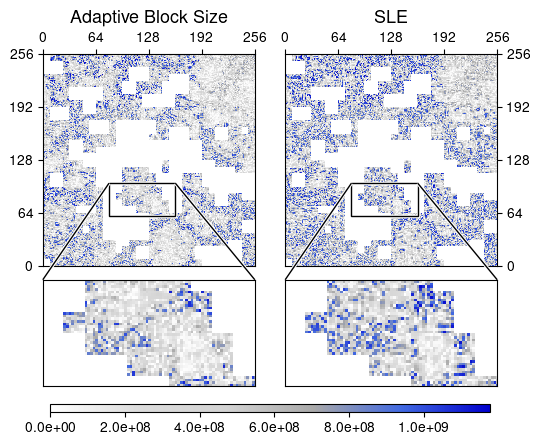

In [86]:
subregion = [80, 160, 60, 100]

fig, axes = plt.subplots(
    ncols=2, figsize=[5.5, 4], dpi=100, sharey="all", sharex="all"
)
draw_ax256(
    axes[0],
    dg256,
    [0, 255, 0, 255],
    subregion,
    [0.0, -0.7, 1, 0.77],
    False,
    [0, 64, 128, 192, 256]
)
im = draw_ax256(
    axes[1],
    db256,
    [0, 255, 0, 255],
    subregion,
    [0.0, -0.7, 1, 0.77],
    True,
    [0, 64, 128, 192, 256]
)

axes[0].set_title(r"Adaptive Block Size", fontsize=13)
axes[1].set_title(r"SLE", fontsize=13)

fig.tight_layout()

fig.subplots_adjust(bottom=-.8)
cbar_ax = fig.add_axes([.1, -.55, .8, 0.02])
fig.colorbar(im, cax=cbar_ax, orientation="horizontal")
cbar_ax.xaxis.set_major_formatter(
    matplotlib.ticker.StrMethodFormatter("{x:.1e}")
)

dt_string = datetime.now().strftime("%y-%m-%d.%H-%M-%S")
date, time = dt_string.split(".")
ofname = f"{date}_err256_{time}"

fig.savefig(ofname + ".pdf", dpi=600, bbox_inches="tight")


# 512

In [87]:
subregion1 = [176, 256, 52, 132]
subregion2 = [400, 480, 52, 132]
subregions = (subregion1, subregion2)

subheight = 0.48
subwidth = subheight
pos1 = [0.0, -0.55, subwidth, subheight]
pos2 = [1 - subwidth, -0.55, subwidth, subheight]

inset_axes_poses = (pos1, pos2)

def draw_ax512(
    ax,
    data,
    data_extent,
    vmax, 
    show_tick_on_right=False,
    xyticks = [0, 128, 256, 384, 512]
):
    Z2, extent = data, data_extent
    im = ax.imshow(
        Z2,
        extent=extent,
        origin="lower",
        # cmap="inferno",
        cmap=cmap_gray2blue,
        interpolation="nearest",
        vmax=vmax512,
    )

    for i, (subr, pos) in enumerate(zip(subregions, inset_axes_poses)):
        axins = ax.inset_axes(pos)  # relative to the axis
        axins.imshow(
            Z2,
            extent=extent,
            origin="lower",
            # cmap="inferno",
            cmap=cmap_gray2blue,
            interpolation="nearest",
            vmax=vmax512,
        )
        x1, x2, y1, y2 = subr
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1, y2)

        ax.set_xticks(xyticks), ax.set_yticks(xyticks)
        ax.xaxis.set_major_formatter(fmt), ax.yaxis.set_major_formatter(fmt)
e
        mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="white", lw=2.5)
        mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="black", lw=1)

        axins.tick_params(
            left=False, labelleft=False, bottom=False, labelbottom=False
        )

    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    if show_tick_on_right:
        ax.tick_params(
            left=False, labelleft=False, right=True, labelright=True
        )
    
    return im

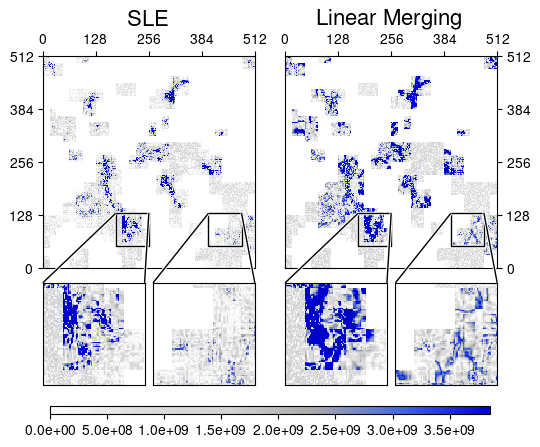

In [89]:
fig, axes = plt.subplots(
    ncols=2, figsize=[5.5, 4], dpi=100, sharey="all", sharex="all"
)
draw_ax512(axes[0], good512, [0, 511, 0, 511], vmax512, False)
im = draw_ax512(axes[1], bad512, [0, 511, 0, 511], vmax512, True)

axes[0].set_title("SLE", fontsize=16)
axes[1].set_title("Linear Merging", fontsize=16)

fig.tight_layout()    
cbar_ax = fig.add_axes([.1, -.55, .8, 0.02])
fig.colorbar(im, cax=cbar_ax, orientation="horizontal")
cbar_ax.xaxis.set_major_formatter(
    matplotlib.ticker.StrMethodFormatter("{x:.1e}")
)

dt_string = datetime.now().strftime("%y-%m-%d.%H-%M-%S")
date, time = dt_string.split(".")
ofname = f"{date}_err512_{time}"


fig.savefig(ofname + ".pdf", dpi=600, bbox_inches="tight")

# extracted blocks

256:
x(120,200)
y(4,44)
z17

512:
x(176,256)
y(52,132)
z31

x(400,480)
y(52,132)
z31

In [82]:
# !rm *err*.pdf

# final, new 512

In [83]:
final_ori = np.fromfile("/home/jtian/data/sc23-amr/final/ori512.raw", dtype="f8")
final_good = np.fromfile("/home/jtian/data/sc23-amr/final/good512.raw", dtype="f8")
final_bad = np.fromfile("/home/jtian/data/sc23-amr/final/bad512.raw", dtype="f8")

len3 = (512, 512, 512)

diff_good = np.abs(final_ori - final_good)
diff_good.tofile("final_diff_good512.raw")
final_dg512 = diff_good.reshape(len3)

diff_bad = np.abs(final_ori - final_bad)
diff_bad.tofile("final_diff_bad512.raw")
final_db512 = diff_bad.reshape(len3)

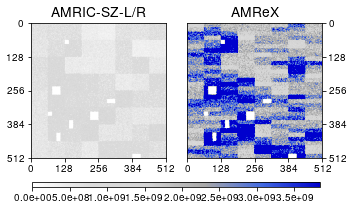

In [92]:
final_good512_slice = final_dg512[47]
final_bad512_slice = final_db512[47]

range_cutoff_factor = 5
final_vmax512 = np.max([np.max(final_good512_slice), np.max(final_bad512_slice)]) / range_cutoff_factor

fig, axes = plt.subplots(ncols=2, figsize=[5, 3])
axes[0].imshow(final_good512_slice, vmax=final_vmax512, cmap=cmap_gray2blue)
axes[0].set_title    ("AMRIC-SZ-L/R", fontsize=14)

axes[1].imshow(final_bad512_slice, vmax=final_vmax512, cmap=cmap_gray2blue)
axes[1].set_title("AMReX", fontsize=14)

axes[1].tick_params(left=False, labelleft=False, right=True, labelright=True)

xyticks = [0, 128, 256, 384, 512]
for ax in axes:
    ax.xaxis.set_major_formatter(fmt), ax.yaxis.set_major_formatter(fmt)
    ax.set_xticks(xyticks), ax.set_yticks(xyticks)

fig.tight_layout()

fig.subplots_adjust(bottom=-.8)
cbar_ax = fig.add_axes([.1, -.37, .8, 0.02])
fig.colorbar(im, cax=cbar_ax, orientation="horizontal")
cbar_ax.xaxis.set_major_formatter(
    matplotlib.ticker.StrMethodFormatter("{x:.1e}")
)

dt_string = datetime.now().strftime("%y-%m-%d.%H-%M-%S")
date, time = dt_string.split(".")
ofname = f"{date}_err512_final_{time}"

fig.savefig(ofname + ".pdf", dpi=600, bbox_inches="tight")

In [85]:
!rm *err*.pdf